# WeatherPy Review
----
A minimum of 500 unique (non-repeat) cities were sampled based on latitude and longitude to assess weather conditions. To determine if weather conditions differ at the equator, the following plots were generated:

#### Latitude vs. Max Temperature
* Cities located **between the latitudes of -20 to 12** report the **most elevated temperatures with 75 degrees Fahrenheit and above.**

#### Latitude vs. Humidity (%)
* Cities located **between the latitudes of 45 to 60** report the **most events with 80% humidity and above.**

#### Latitude vs. Cloudiness (%)
* There is no correlation with latitude and cloudiness.

#### Latitude vs. Wind Speed (mph)
* There is no correlation with latitude and wind speeds. As latitude decreases, cities observe less wind events.

In [1]:
# Dependencies and Setup
import time
import json
import csv

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from config import api_key

In [2]:
pip freeze

appnope==0.1.2
argon2-cffi==20.1.0
async-generator==1.10
attrs==21.2.0
backcall==0.2.0
bleach==3.3.0
certifi==2021.5.30
cffi==1.14.5
chardet==4.0.0
chart-studio==1.1.0
citipy==0.0.5
click==8.0.1
cycler==0.10.0
debugpy==1.3.0
decorator==5.0.9
defusedxml==0.7.1
entrypoints==0.3
Flask==2.0.1
Flask-SQLAlchemy==2.5.1
greenlet==1.1.0
idna==2.10
ipykernel==6.0.1
ipython==7.25.0
ipython-genutils==0.2.0
ipywidgets==7.6.3
itsdangerous==2.0.1
jedi==0.18.0
Jinja2==3.0.1
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==6.2.0
jupyter-console==6.4.0
jupyter-core==4.7.1
jupyterlab-pygments==0.1.2
jupyterlab-widgets==1.0.0
kdtree==0.16
kiwisolver==1.3.1
MarkupSafe==2.0.1
matplotlib==3.4.2
matplotlib-inline==0.1.2
mistune==0.8.4
nbclient==0.5.3
nbconvert==6.1.0
nbformat==5.1.3
nest-asyncio==1.5.1
notebook==6.4.0
numpy==1.21.0
packaging==21.0
pandas==1.3.0
pandocfilters==1.4.3
parso==0.8.2
pexpect==4.8.0
pickleshare==0.7.5
Pillow==8.3.1
plotly==5.1.0
prometheus-client==0.11.0
prompt-toolkit==3.0.19
psuti

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
c_data = []
record_count = 1
set_count = 1

print("Beginning Data Retrieval")
print("------------------------")
for i,city in enumerate(cities):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&APPID=" + api_key + "&units=Imperial"
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        city_weather = rq.get(url).json()
        c_data.append({
            "City" : city,
            "Lat" : city_weather["coord"]["lat"],
            "Lng" : city_weather["coord"]["lon"],
            "Max Temp" : city_weather["main"]["temp_max"],
            "Humidity" : city_weather["main"]["humidity"],
            "Cloudiness" : city_weather["clouds"]["all"],
            "Wind Speed" : city_weather["wind"]["speed"],
            "Country" : city_weather["sys"]["country"],
            "Date" : city_weather["dt"]
        })
    except:
        print("City not found. Skipping...")
        pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | korla
City not found. Skipping...
Processing Record 2 of Set 1 | wagar
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | thinadhoo
Processing Record 6 of Set 1 | pundaguitan
Processing Record 7 of Set 1 | toora-khem
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | turbat
Processing Record 10 of Set 1 | san borja
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | dakar
Processing Record 13 of Set 1 | asahi
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | aksu
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | samarai
Processing Record 20 of Set 1 | vrangel
Processing Record 21 of Set 1 | mapiripan
Processing Record 22 of Set 1 | miri
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
c_df = pd.DataFrame(c_data).sort_index(axis=1)
c_df.to_csv('cities.csv')
c_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,wagar,77,US,1578412142,63,31.44,-87.99,57.00,1.01
1,punta arenas,100,CL,1578412142,62,-53.16,-70.91,57.20,6.93
2,severo-kurilsk,98,RU,1578412142,88,50.68,156.12,20.79,11.70
3,thinadhoo,37,MV,1578412142,75,0.53,72.93,84.09,17.60
4,pundaguitan,100,PH,1578412142,75,6.37,126.17,79.72,1.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

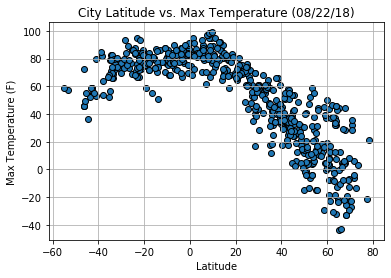

In [5]:
x = c_df['Lat']
y_1 = c_df['Max Temp']

plt.scatter(x, y_1, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Max Temperature (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Save and Show Figure
plt.savefig('lat_vs_max_temp.png')

#### Latitude vs. Humidity Plot

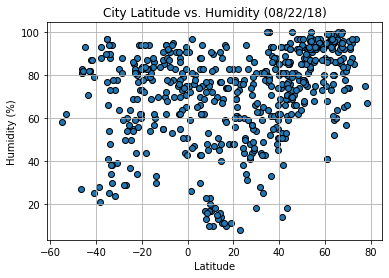

In [6]:
y_2 = c_df['Humidity']

plt.scatter(x, y_2, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Humidity (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Save and Show Figure
plt.savefig('lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

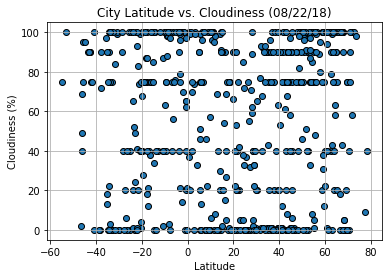

In [7]:
y_3 = c_df['Cloudiness']

plt.scatter(x, y_3, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Cloudiness (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Save and Show Figure
plt.savefig('lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

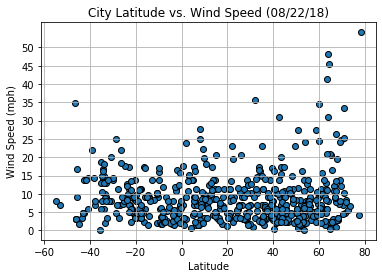

In [8]:
y_4 = c_df['Wind Speed']

plt.scatter(x, y_4, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Wind Speed (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.yticks(np.arange(0, 55, 5))

#Save and Show Figure
plt.savefig('lat_vs_wind_speed.png')